# Figure 12: Behaviour for block (T4 or T5)

In [1]:
from setup_nb import *
from collections import defaultdict

### Data

In [2]:
# General preprocessing (filtering + left-right subtraction):

def preprocess(data):
    
    # First, we take the difference between left- and right-directed stimuli and apply a soft low-pass filter:
    data = preprocess_standard(data, filter=0.1)
    
    # For evaluation, we tange the mean rotation over a certain range:
    evald = groupexcept(data, 'time').aggregate(rangemean, r=slice(1.5, 3.0))
    
    return data, evald

In [3]:
data_rphi, evald_rphi = preprocess(pd.read_hdf("../data/behav_rphi.data"))
data_ultra, evald_ultra = preprocess(pd.read_hdf("../data/behav_ultra.data"))

In [4]:
data_rphi.head()

rotation  \
genotype          flyname              velocity lambda time              
F1 TNT x X154 (A) 20161213_fly44_exp01 16.0     30.0   0.00  19.708440   
                                                       0.05  19.708440   
                                                       0.10  24.983210   
                                                       0.15  18.990888   
                                                       0.20  13.902132   

                                                              forward  
genotype          flyname              velocity lambda time            
F1 TNT x X154 (A) 20161213_fly44_exp01 16.0     30.0   0.00  0.699834  
                                                       0.05  0.699834  
                                                       0.10  0.695719  
                                                       0.15  0.697857  
                                                       0.20  0.795165

In [5]:
data_ultra.head()

rotation  \
genotype       flyname              reverse jump_width dc    jump_gap contrast lambda time              
F1 TNT x id114 20170120_fly09_exp01 0.0     4.0        100.0 1.0      80.0     30.0   0.00  29.047853   
                                                                                      0.05  29.047853   
                                                                                      0.10  19.855762   
                                                                                      0.15   6.916277   
                                                                                      0.20  -4.724132   

                                                                                             forward  
genotype       flyname              reverse jump_width dc    jump_gap contrast lambda time            
F1 TNT x id114 20170120_fly09_exp01 0.0     4.0        100.0 1.0      80.0     30.0   0.00  0.634308  
                                                                                      0.05  0.634308  
                                                                                      0.10  0.593042  
                                                                                      0.15  0.599059  
                                                                                      0.20  0.615815

In [6]:
gts_rphi_t4 = ["F1 TNT x X154 (A)", "F1 id548 x X154 (D)", "F1 TNT x id548 (B)"]
gts_rphi_t5 = ["F1 TNT x X154 (A)", "F1 id114 x X154 (E)", "F1 TNT x id114 (C)"]

gts_ultra = ['F1 X154 x TNT', 'F1 TNT x id548', 'F1 TNT x id114']

In [15]:
d1, d2 = data_ultra.reset_index(), data_rphi.reset_index()
    
print "Reverse Phi condition (T4 block):"
for gt in gts_rphi_t4:
    n = len(d2[d2.genotype == gt].flyname.unique())
    print "{0}: N={1}".format(gt, n)
    
print "Reverse Phi condition (T5 block):"
for gt in gts_rphi_t5:
    n = len(d2[d2.genotype == gt].flyname.unique())
    print "{0}: N={1}".format(gt, n)
    
print "Ultra condition:"
for gt in gts_ultra:
    n = len(d1[d1.genotype == gt].flyname.unique())
    print "{0}: N={1}".format(gt, n)

Reverse Phi condition (T4 block):
F1 TNT x X154 (A): N=12
F1 id548 x X154 (D): N=18
F1 TNT x id548 (B): N=14
Reverse Phi condition (T5 block):
F1 TNT x X154 (A): N=12
F1 id114 x X154 (E): N=12
F1 TNT x id114 (C): N=15
Ultra condition:
F1 X154 x TNT: N=11
F1 TNT x id548: N=12
F1 TNT x id114: N=13


### Statistics

In [75]:
def ttest_velocity(my_evald, block, comps):
    
    vels = my_evald.index.levels[2].values
    
    alpha = 0.05 / len(vels)
    sigs = []
    
    for vel in vels:
                
        blocks = my_evald.loc[pd.IndexSlice[block, :, vel, 90.0], :].rotation.values
        control1 = my_evald.loc[pd.IndexSlice[comps[0], :, vel, 90.0], :].rotation.values
        control2 = my_evald.loc[pd.IndexSlice[comps[1], :, vel, 90.0], :].rotation.values
        
        ts1, p1 = ttest_ind(blocks, control1, equal_var=False)
        ts2, p2 = ttest_ind(blocks, control2, equal_var=False)
        
        sig = (p1 < alpha) and (p2 < alpha)
        
        print "Velocity {0} deg/s: t_gal4 = {1}, p_gal4 = {2}, t_eff = {3}, p_eff = {4}".format(vel, ts1, p1, ts2, p2)
        
        sigs.append(sig)
        
    return sigs

In [73]:
def ttest_velocity_single(my_evald, block, comp):
    
    vels = [8, 1]
    
    alpha = 0.05 / len(vels)
    sigs = []
    
    for vel in vels:
                
        blocks = my_evald.loc[pd.IndexSlice[block, :, 1.0, :, :, vel, :, 90.0], :].rotation.values
        control1 = my_evald.loc[pd.IndexSlice[comp, :, 1.0, :, :, vel, :, 90.0], :].rotation.values
        
        ts1, p1 = ttest_ind(blocks, control1, equal_var=False)
        
        sig = (p1 < alpha)
        
        print "Velocity {0} jw: t_eff = {1}, p_eff = {2}".format(vel, ts1, p1)
        
        sigs.append(sig)
        
    return sigs

In [76]:
ttest_velocity(evald_rphi, "F1 TNT x id548 (B)", ("F1 id548 x X154 (D)", "F1 TNT x X154 (A)"))

Velocity 16.0 deg/s: t_gal4 = 3.45975711497, p_gal4 = 0.0017314282384, t_eff = 4.11852944503, p_eff = 0.000531825595917
Velocity 32.0 deg/s: t_gal4 = 2.42230486387, p_gal4 = 0.0241411736859, t_eff = 3.5345621465, p_eff = 0.00201758428337
Velocity 64.0 deg/s: t_gal4 = 0.976795908869, p_gal4 = 0.339297888435, t_eff = 2.30082689161, p_eff = 0.0313247962364
Velocity 128.0 deg/s: t_gal4 = -5.08043436974, p_gal4 = 1.86512582056e-05, t_eff = -6.10512948879, p_eff = 2.83076485284e-06
Velocity 256.0 deg/s: t_gal4 = -3.27861138972, p_gal4 = 0.00278956960887, t_eff = -6.31025119874, p_eff = 1.61226571373e-06


[True, False, False, True, True]

In [77]:
ttest_velocity(evald_rphi, "F1 TNT x id114 (C)", ("F1 id114 x X154 (E)", "F1 TNT x X154 (A)"))

Velocity 16.0 deg/s: t_gal4 = 1.92821900908, p_gal4 = 0.0662966631038, t_eff = 4.01826893759, p_eff = 0.000687338312072
Velocity 32.0 deg/s: t_gal4 = 1.46473938146, p_gal4 = 0.156263400004, t_eff = 3.5914407569, p_eff = 0.00176794301766
Velocity 64.0 deg/s: t_gal4 = 1.3744768912, p_gal4 = 0.182284353459, t_eff = 3.68862267098, p_eff = 0.00125780205456
Velocity 128.0 deg/s: t_gal4 = -5.86943810785, p_gal4 = 9.09235435653e-06, t_eff = -5.0653105737, p_eff = 5.64586545822e-05
Velocity 256.0 deg/s: t_gal4 = -4.79056128531, p_gal4 = 0.000311536460391, t_eff = -9.15246259271, p_eff = 1.03957738646e-07


[False, False, False, True, True]

In [78]:
ttest_velocity_single(evald_ultra, "F1 TNT x id548", "F1 X154 x TNT")

Velocity 8 jw: t_eff = 1.33336994944, p_eff = 0.2002866651
Velocity 1 jw: t_eff = 0.320951018324, p_eff = 0.751823698219


[False, False]

In [79]:
ttest_velocity_single(evald_ultra, "F1 TNT x id114", "F1 X154 x TNT")

Velocity 8 jw: t_eff = 2.83864368628, p_eff = 0.0118218251135
Velocity 1 jw: t_eff = -4.80159687908, p_eff = 0.000173266516905


[True, True]

### Generic plot

In [8]:
def make_summary_panel(data, genotypes, lam, ax, legend=False, ylim=[-100, 100]):
    
    data = data.reset_index()
    data = data[(data["lambda"] == lam) & (data.genotype.isin(genotypes))]
        
    sb.pointplot("velocity", "rotation", hue="genotype", data=data, palette=gt_colors,
                 scale=0.75, ax=ax, ci=standard_ci, hue_order=genotypes)
    
    add_refline(ax, horizontal=True)
    
    ax.set_xlabel(u"Pattern\nspeed (°/s)", labelpad=0)
    ax.set_ylabel(u"Turning speed (°/s)")
    
    ax.legend_.remove()
    
    if legend:
        
        hs, ls_ = ax.get_legend_handles_labels()
        ls = [gt_alias[x] for x in ls_]
                
        lorder = [ls_.index(gt) for gt in genotypes]
        hs, ls = [hs[idx] for idx in lorder], [ls[idx] for idx in lorder]
        
        ax.legend(hs, ls, loc=[0.0, 1.1], ncol=1)
        
        ax.legend_.set_title("")
    
    ax.set_ylim(ylim)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('center')

    yloc = mpl.ticker.MaxNLocator(5)
    ax.yaxis.set_major_locator(yloc)
    
    ax.set_xticklabels([16, 32, 64, 128, 256])
    
    sb.despine(ax=ax)
    ax.patch.set_alpha(0.0)

In [83]:
def make_bar_summary(data, genotypes, lam, gaps, ax, ylim=[-100, 100]):
    
    data = data.reset_index()
    
    # Calculate effective velocity (assuming 144Hz update rate and 4 deg jump width):
    data["velocity"] = 144 * 4.0 / data["jump_gap"]
    
    data = data[(data["lambda"] == lam) & (data.genotype.isin(genotypes))\
                & (data.jump_gap.isin(gaps)) & (data.reverse == 1.0)]
    
    sb.barplot("velocity", "rotation", hue="genotype", data=data, palette=gt_colors,
                   ax=ax, ci=standard_ci, hue_order=genotypes)
    
    add_refline(ax, horizontal=True)
    
    ax.set_xlabel(u"Pattern\nspeed (°/s)")
    ax.set_ylabel(u"Turning speed (°/s)")
    
    ax.legend_.remove()
    
    ax.set_ylim(ylim)
    
    yloc = mpl.ticker.MaxNLocator(5)
    ax.yaxis.set_major_locator(yloc)
    
    ax.set_xticklabels([72, 576])
    
    sb.despine(ax=ax)

In [99]:
def add_asterisks(ax, x_locs, y_locs):
    for x, y in zip(x_locs, y_locs):
        ax.text(x, y, "*", horizontalalignment="center", verticalalignment="center")

In [145]:
def behavior_figure(lambda_pick):
    
    off = 1.5
    off_v = -22.3
    rows = [0, 2.5, 5.0]
    panelsize = (2, 2)

    fig = sb.plt.figure(figsize=(3.2, 2))

    ylim_summary = [-60, 60]

    height = 24 + off_v

    # T4 silencing:
        
    ax = addaxis(fig, (off + rows[0], height), panelsize, letter="a", nudge=0.1)
    make_summary_panel(evald_rphi, gts_rphi_t4, lambda_pick, ax, ylim=ylim_summary, legend=True)
    vals = evald_rphi.loc[pd.IndexSlice["F1 TNT x id548 (B)", :, :, 90.0], :].groupby("velocity").mean().rotation.values
    add_asterisks(ax, [0, 3, 4], vals[[0, 3, 4]] + np.array([15, -20, -25]))
    
    # T5 silencing:
    
    ax = addaxis(fig, (off + rows[1], height), panelsize, letter="b", nudge=0.1)
    make_summary_panel(evald_rphi, gts_rphi_t5, lambda_pick, ax, ylim=ylim_summary, legend=True)
    remove_axis(ax, y=True)
    vals = evald_rphi.loc[pd.IndexSlice["F1 TNT x id114 (C)", :, :, 90.0], :].groupby("velocity").mean().rotation.values
    add_asterisks(ax, [3, 4], vals[[3, 4]] + np.array([-20, -20]))
    
    # Ultra:
    
    ax = addaxis(fig, (off + rows[2], height), (1, 2), letter="c", nudge=0.1)
    make_bar_summary(evald_ultra, gts_ultra, lambda_pick, [8, 1], ax, ylim=ylim_summary)
    remove_axis(ax, y=True)
    add_asterisks(ax, [0.28, 1.28], [-50, 20])
    
    fig.set_frameon(False)
    fig.savefig("../output/Fig12.tif", format="tiff", dpi=standard_dpi)

### Plots

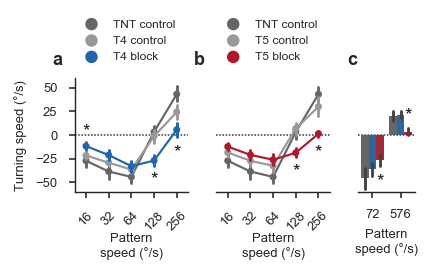

In [146]:
behavior_figure(lambda_pick=90.0)